Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Guilherme de Abreu Lima Buitrago Miranda"
COLLABORATORS = ""

---

# Exercício Prático 1: Convolução

Neste exercício iremos implementar a função que calcula a convolução de uma matriz ```top``` sobre uma imagem. Não é permitido usar as funções correlate ou convolve de scipy.ndimage.filters.


In [2]:
# importa as bibliotecas e seta alguns parâmetros

%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_openml
from matplotlib import pyplot as plt, rcParams
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [3]:
# define duas funções para imprimir matrizes como imagens

def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [4]:
# carrega um '5' escrito a mão a partir do arquivo exemplo.npy
with open('entrada.npy','rb') as infile:
    image = np.load(infile)

In [5]:
# Baixa e carrega o dataset mnist_784 que contém 70000 dígitos escritos a mão.
# Ele foi comentado pois não será necessário.

# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# images = np.reshape(mnist['data'], (70000, 28, 28))
# labels = mnist['target'].astype(int)
# n=len(images)
# images.shape, labels.shape
# images = images/255
# image = images[0]

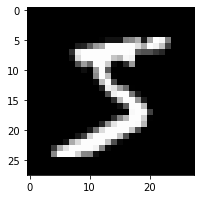

In [6]:
# plota imagem
plot(image)

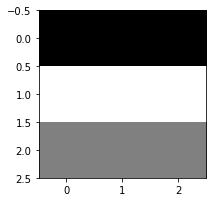

In [7]:
# define e plota matriz top

top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

top = np.array(top)
plot(top)

In [8]:
def convolucao(top, image):
    """ Calcula a matriz result que é obtida pela convolução da matriz top
        sobre a imagem image.
        
        Dicas:
        1. Inicializar a matriz result com np.zeros ou np.empty (Qual o número de linhas? E de colunas?)
        2. Iterar sobre cada posição de result fazendo a combinação linear dos coeficientes de top e das
           posições correspondentes em image. Note que é possível multiplicar matrizes elemento a elemento
           usando o operador *. Consulte np.sum() também.
        3. Retornar result
    """
    
    result = np.zeros((26, 26))
    
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            acumulator = 0
            acumulator = image[i-1:i+2, j-1:j+2]*top
            #print(np.sum(acumulator))
            result[i-1, j-1] = np.sum(acumulator)
                    
        
    return result
    
    
    # YOUR CODE HERE
    #raise NotImplementedError()

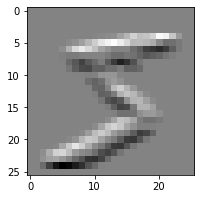

In [9]:
# plota result
result = convolucao(top,image)
plot(result)

In [10]:
with open('saida.npy','rb') as infile:
    answer = np.load(infile)
assert (result == answer).all()


In [11]:
# additional *hidden* tests
